In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
dataset=pd.read_csv("placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()
#que2. In this data set those not placed that people only salary nan.so there are 67 people not placed

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
#There are 4 ways to replace the missing values which are:
#1)Replacing the missing values with central tendancy-mean,median,mode
#2)entire row delete
#3)Respective to the problem,have to replace the missing values
#4)consider this as a semi supervised,create a model,so that  we can predict the missing values.

In [6]:
#1.if use Central Tendancy means it will consider like salary getting this will change the value so can,t use
#2.if we delete entire row all detetails will miss
#3.replacing the missing values with 0 means this will not make any changes in the dataset
#4.semi supervised if we use salary we have to consider as output so again the values will be change

In [7]:
# que 2:replace tha NaN values with correct value,and justify the why you have chosen them
dataset["salary"].fillna(0,inplace=True)
#missing values replace with zero so the dataset values are not changed

In [8]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [9]:
#corelation
dataset.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [10]:
# que-4 what kind of relation between salary and mba_p
#ans: 0.13

In [11]:
specialisation_min_salary = dataset.groupby('specialisation')['salary'].min()

In [12]:
# que no:5 which specialization is getting minimum salary
specialisation_min_salary

specialisation
Mkt&Fin    0.0
Mkt&HR     0.0
Name: salary, dtype: float64

In [13]:

above_5000_count = (dataset['salary'] > 5000).sum()

In [14]:
#que:6 how many of them getting above 5,000 salary
above_5000_count

148

In [15]:
import scipy.stats as stats
f_statistic, p_value = stats.f_oneway(dataset['etest_p'],dataset['mba_p'])


In [16]:
f_statistic, p_value

(98.64487057324706, 4.672547689133573e-21)

In [17]:
# que:7 Testing the analysis of variance between etest_p and mba_p at significant level 5%(make decision  using hypothesis testing
if  p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between the groups.")

Reject the null hypothesis: There are significant differences between the groups.


In [18]:
from scipy.stats import ttest_ind
degree_t = dataset[dataset['degree_t'] == 'sci&tech']['salary']
specialisation = dataset[dataset['specialisation'] == 'mk&HR']['salary']
ttest_ind(degree_t,specialisation)




Ttest_indResult(statistic=nan, pvalue=nan)

In [19]:
# que-8 Test the similarity between the degree_t (sci&Tech) & Specialization (Mk&HR)with respcet to salary at significance level of 5% (make decision using Hypothesis Testing)
if  p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between the groups.")

Reject the null hypothesis: There are significant differences between the groups.


In [20]:
def std_ND_graph(dataset):
#converting from normal distribution to standard normal distribution always SND should be (-3,-2,-1 0,1,2,3) 
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    
    values=(i for i in dataset)
    
    z_score=[((j-mean)/std) for j in values]
    
    sns.distplot(z_score,kde=True)
    
    sum(z_score)/len(z_score)
    #z_score.std()

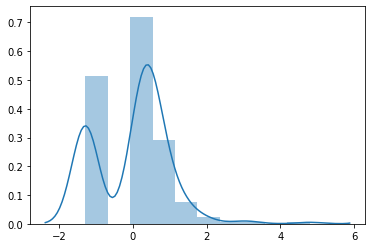

In [33]:
# que-9. convert ND to SND for salary column
std_ND_graph(dataset["salary"])

In [22]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    # distplot for diagram kde=True means kernal density true for curve in diagram 
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    #axis vertical line 
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample = dataset
    #calculate the parameter
    sample_mean =sample.mean()
    sample_std =sample.std()
    print('mean-%.3f,Standard Deviation-%3f' % (sample_mean, sample_std))
    #define the distribution
    dist = norm(sample_mean, sample_std)
    #sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    #pdf is function 
    probabilities = [dist.pdf(value) for value in values]
    #sumission have to take 
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

mean-198702.326,Standard Deviation-154780.926716
The area between range(700000,900000):0.0005973310593974901


0.0005973310593974901

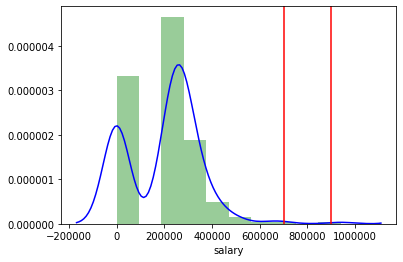

In [23]:
# what is the probability Density Function of the salary range from 7000000 to 900000
get_pdf_probability(dataset["salary"],700000,900000)

In [24]:
#que-11.Test the similarity between the degree (sci&Tech) with respect to etest_p & mba_p at significancevlevel of 5%(make decision using Hypothesis Testing)
# Perform the hypothesis testing
# Extract the relevant data for each category of degree_t
sci_tech_data = dataset[dataset['degree_t'] == 'Sci&Tech']
other_data = dataset[dataset['degree_t'] != 'Sci&Tech']

In [25]:
# Perform an ANOVA test to compare 'etest_p' and 'mba_p' across the categories of degree_t
anova_etest_p = stats.f_oneway(sci_tech_data['etest_p'], other_data['etest_p'])
anova_mba_p = stats.f_oneway(sci_tech_data['mba_p'], other_data['mba_p'])
ttest_ind(anova_etest_p, anova_mba_p)





Ttest_indResult(statistic=-0.741925739099869, pvalue=0.5354294160411822)

In [26]:
alpha = 0.05

In [27]:
# Step 3: Make a decision based on the test results
if anova_etest_p.pvalue < alpha:
    print(f"The p-value for etest_p ({anova_etest_p.pvalue}) is less than the significance level ({alpha}).")
    print("Reject the null hypothesis. There is a significant difference in etest_p between Sci&Tech and other categories of degree_t.")
else:
    print(f"The p-value for etest_p ({anova_etest_p.pvalue}) is greater than or equal to the significance level ({alpha}).")
    print("Fail to reject the null hypothesis. There is no significant difference in etest_p between Sci&Tech and other categories of degree_t.")

The p-value for etest_p (0.8869950436323462) is greater than or equal to the significance level (0.05).
Fail to reject the null hypothesis. There is no significant difference in etest_p between Sci&Tech and other categories of degree_t.


In [28]:
if anova_mba_p.pvalue < alpha:
    print(f"The p-value for mba_p ({anova_mba_p.pvalue}) is less than the significance level ({alpha}).")
    print("Reject the null hypothesis. There is a significant difference in mba_p between Sci&Tech and other categories of degree_t.")
else:
    print(f"The p-value for mba_p ({anova_mba_p.pvalue}) is greater than or equal to the significance level ({alpha}).")
    print("Fail to reject the null hypothesis. There is no significant difference in mba_p between Sci&Tech and other categories of degree_t.")

The p-value for mba_p (0.06732694154186185) is greater than or equal to the significance level (0.05).
Fail to reject the null hypothesis. There is no significant difference in mba_p between Sci&Tech and other categories of degree_t.


In [29]:
correlation_matrix = dataset.corr()
salary_correlations = correlation_matrix['salary'].sort_values(ascending=False)

In [30]:
# que-12 which parameter is highly corelated with salary?
salary_correlations
# ssc_p is highly co-related with salary 0.53

salary      1.000000
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
sl_no       0.002543
Name: salary, dtype: float64

In [31]:
#plot any useful graph & explain it?
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    # distplot for diagram kde=True means kernal density true for curve in diagram 
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    #axis vertical line 
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample = dataset
    #calculate the parameter
    sample_mean =sample.mean()
    sample_std =sample.std()
    print('mean-%.3f,Standard Deviation-%3f' % (sample_mean, sample_std))
    #define the distribution
    dist = norm(sample_mean, sample_std)
    #sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    #pdf is function 
    probabilities = [dist.pdf(value) for value in values]
    #sumission have to take 
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

mean-67.303,Standard Deviation-10.827205
The area between range(60,70):0.3449514151280294


0.3449514151280294

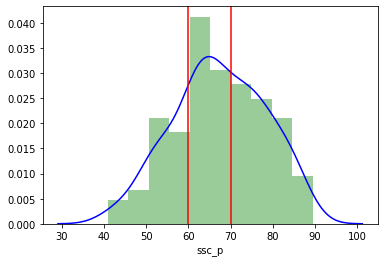

In [32]:
 get_pdf_probability(dataset["ssc_p"],60,70)